In [13]:
import cv2
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
from panorama_helper import *

Load the Input Image Based on imageSet
-given: given set of images
-custom: custom set of images

In [14]:
'''get the input image'''
imageSet = "given"
input_image_list_raw, input_image_list_grey = loadImages(imageSet)

Build list of Candidate Matches
-candidate_matches_float: list of candidate matches in fp
-candidate_matches_int: list of candidate matches in int
-each index is a list of two points (tuples)'''

In [15]:
'''candidate matches between img0, img1'''
candidate_matches_float_01, candidate_matches_int_01 = getCandidateMatches(input_image_list_grey[0], input_image_list_grey[1])
assert(len(candidate_matches_float_01) == len(candidate_matches_int_01))

'''candidate matches between img1, img2'''
candidate_matches_float_12, candidate_matches_int_12 = getCandidateMatches(input_image_list_grey[1], input_image_list_grey[2])
assert (len(candidate_matches_float_12) == len(candidate_matches_int_12))

'''candidate matches between img2, img3'''
candidate_matches_float_23, candidate_matches_int_23 = getCandidateMatches(input_image_list_grey[2], input_image_list_grey[3])
assert (len(candidate_matches_float_23) == len(candidate_matches_int_23))

'''candidate matches between img3, img4'''
candidate_matches_float_34, candidate_matches_int_34 = getCandidateMatches(input_image_list_grey[3], input_image_list_grey[4])
assert (len(candidate_matches_float_34) == len(candidate_matches_int_34))

Get the best homography and best inlier set

In [16]:
bestHomography_01, best_inlier_set_01 = performRANSAC(candidate_matches_float_01, candidate_matches_int_01)

bestHomography_12, best_inlier_set_12 = performRANSAC(candidate_matches_float_12, candidate_matches_int_12)

bestHomography_23, best_inlier_set_23 = performRANSAC(candidate_matches_float_23, candidate_matches_int_23)

bestHomography_34, best_inlier_set_34 = performRANSAC(candidate_matches_float_34, candidate_matches_int_34)

100%|██████████| 1000/1000 [00:29<00:00, 34.16it/s]


Plot the Inlier Set For Each Adjacent Image

In [17]:
rainbow = [(211, 0, 148), (130, 0, 75), (255, 0, 0), (0, 255, 0), (0, 255, 255), (0, 127, 255), (0, 0, 255)]

'''Best Inlier and Outlier Set 01'''
inlier_01 = np.concatenate((input_image_list_raw[0], input_image_list_raw[1]), axis=1)
outlier_01 = deepcopy(inlier_01)
candidate_match_all_01 = deepcopy(inlier_01)
for pair in tqdm(candidate_matches_float_01):
    x = pair[0]
    x_prime = pair[1]
    width = input_image_list_raw[0].shape[1]
    p1 = (int(x[0]), int(x[1]))
    p2 = (int(x_prime[0]) + width, int(x_prime[1]))
    color = random.choice(rainbow)
    if pair in best_inlier_set_01:
        cv2.circle(inlier_01, p1, 4, color, -1)
        cv2.circle(inlier_01, p2, 4, color, -1)
        cv2.line(inlier_01, p1, p2, color, 1)
    else:
        cv2.circle(outlier_01, p1, 4, color, -1)
        cv2.circle(outlier_01, p2, 4, color, -1)
        cv2.line(outlier_01, p1, p2, color, 1)
    cv2.circle(candidate_match_all_01, p1, 4, color, -1)
    cv2.circle(candidate_match_all_01, p2, 4, color, -1)
    cv2.line(candidate_match_all_01, p1, p2, color, 1)



'''Best Inlier Set 12'''
inlier_12 = np.concatenate((input_image_list_raw[1], input_image_list_raw[2]), axis=1)
outlier_12 = deepcopy(inlier_12)
candidate_match_all_12 = deepcopy(inlier_12)
for pair in tqdm(candidate_matches_float_12):
    x = pair[0]
    x_prime = pair[1]
    width = input_image_list_raw[1].shape[1]
    p1 = (int(x[0]), int(x[1]))
    p2 = (int(x_prime[0]) + width, int(x_prime[1]))
    color = random.choice(rainbow)
    if pair in best_inlier_set_12:
        cv2.circle(inlier_12, p1, 4, color, -1)
        cv2.circle(inlier_12, p2, 4, color, -1)
        cv2.line(inlier_12, p1, p2, color, 1)
    else:
        cv2.circle(outlier_12, p1, 4, color, -1)
        cv2.circle(outlier_12, p2, 4, color, -1)
        cv2.line(outlier_12, p1, p2, color, 1)
    cv2.circle(candidate_match_all_12, p1, 4, color, -1)
    cv2.circle(candidate_match_all_12, p2, 4, color, -1)
    cv2.line(candidate_match_all_12, p1, p2, color, 1)


'''Best Inlier Set 23'''
inlier_23 = np.concatenate((input_image_list_raw[2], input_image_list_raw[3]), axis=1)
outlier_23 = deepcopy(inlier_23)
candidate_match_all_23 = deepcopy(inlier_23)
for pair in tqdm(candidate_matches_float_23):
    x = pair[0]
    x_prime = pair[1]
    width = input_image_list_raw[2].shape[1]
    p1 = (int(x[0]), int(x[1]))
    p2 = (int(x_prime[0]) + width, int(x_prime[1]))
    color = random.choice(rainbow)
    if pair in best_inlier_set_23:
        cv2.circle(inlier_23, p1, 4, color, -1)
        cv2.circle(inlier_23, p2, 4, color, -1)
        cv2.line(inlier_23, p1, p2, color, 1)
    else:
        cv2.circle(outlier_23, p1, 4, color, -1)
        cv2.circle(outlier_23, p2, 4, color, -1)
        cv2.line(outlier_23, p1, p2, color, 1)
    cv2.circle(candidate_match_all_23, p1, 4, color, -1)
    cv2.circle(candidate_match_all_23, p2, 4, color, -1)
    cv2.line(candidate_match_all_23, p1, p2, color, 1)

'''Best Inlier Set 34'''
inlier_34 = np.concatenate((input_image_list_raw[3], input_image_list_raw[4]), axis=1)
outlier_34 = deepcopy(inlier_34)
candidate_match_all_34 = deepcopy(inlier_34)
for pair in tqdm(candidate_matches_float_34):
    x = pair[0]
    x_prime = pair[1]
    width = input_image_list_raw[3].shape[1]
    p1 = (int(x[0]), int(x[1]))
    p2 = (int(x_prime[0]) + width, int(x_prime[1]))
    color = random.choice(rainbow)
    if pair in best_inlier_set_34:
        cv2.circle(inlier_34, p1, 4, color, -1)
        cv2.circle(inlier_34, p2, 4, color, -1)
        cv2.line(inlier_34, p1, p2, color, 1)
    else:
        cv2.circle(outlier_34, p1, 4, color, -1)
        cv2.circle(outlier_34, p2, 4, color, -1)
        cv2.line(outlier_34, p1, p2, color, 1)
    cv2.circle(candidate_match_all_34, p1, 4, color, -1)
    cv2.circle(candidate_match_all_34, p2, 4, color, -1)
    cv2.line(candidate_match_all_34, p1, p2, color, 1)

'''Inliers and Outliers For Image 01'''
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_inliers_01.jpg", inlier_01)
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_outlier_01.jpg", outlier_01)

'''Inliers and Outliers For Image 12'''
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_inliers_12.jpg", inlier_12)
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_outlier_12.jpg", outlier_12)

'''Inliers and Outliers For Image 23'''
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_inliers_23.jpg", inlier_23)
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_outlier_23.jpg", outlier_23)

'''Inliers and Outliers For Image 34'''
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_inliers_34.jpg", inlier_34)
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_outlier_34.jpg", outlier_34)

'''All Correspondences Found By Sift'''
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_all_correspondences_01.jpg", candidate_match_all_01)
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_all_correspondences_12.jpg", candidate_match_all_12)
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_all_correspondences_23.jpg", candidate_match_all_23)
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_all_correspondences_34.jpg", candidate_match_all_34)

100%|██████████| 3166/3166 [00:00<00:00, 11556.35it/s]


True

Stitch all the images together into a Panorama

0.01287536204954454
0.010048027659479201
0.008855204474536528
0.007683439921802976


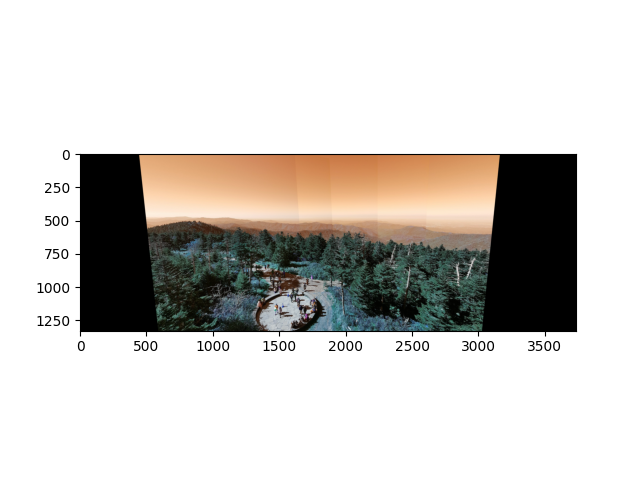

In [18]:
list_best_homography = [bestHomography_01,
                        bestHomography_12,
                        bestHomography_23,
                        bestHomography_34]

panorama = getPanorama(list_best_homography, input_image_list_raw)
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_panorama.jpg", panorama)
plt.imshow(panorama)

list_lm_homographies = [performLM(bestHomography_01, best_inlier_set_01),
                        performLM(bestHomography_12, best_inlier_set_12),
                        performLM(bestHomography_23, best_inlier_set_23),
                        performLM(bestHomography_34, best_inlier_set_34)]

lm_panorama = getPanorama(list_lm_homographies, input_image_list_raw)
cv2.imwrite(f"/Users/wang3450/Desktop/ECE661/HW05/{imageSet}_lm_panorama.jpg", lm_panorama)
plt.imshow(lm_panorama)
